In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

# from pycaret  import regression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df = df[~(df['Rainfall'].isnull())]

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            487
MaxTemp            470
Rainfall             0
Evaporation      60488
Sunshine         67820
WindGustDir       9725
WindGustSpeed     9665
WindDir9am        9789
WindDir3pm        3799
WindSpeed9am      1091
WindSpeed3pm      2647
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Cloud9am         53331
Cloud3pm         56874
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.342478
MaxTemp           0.330523
Rainfall          0.000000
Evaporation      42.537571
Sunshine         47.693725
WindGustDir       6.839007
WindGustSpeed     6.796813
WindDir9am        6.884015
WindDir3pm        2.671608
WindSpeed9am      0.767235
WindSpeed3pm      1.861476
Humidity9am       1.092835
Humidity3pm       2.552761
Pressure9am       9.803163
Pressure3pm       9.840435
Cloud9am         37.504483
Cloud3pm         39.996062
Temp9am           0.481719
Temp3pm           1.931097
RainToday         0.000000
RainTomorrow      0.992975
dtype: float64

In [9]:
df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [10]:
df.isnull().sum()/df.shape[0]*100

Location         0.000000
MinTemp          0.342478
MaxTemp          0.330523
Rainfall         0.000000
WindGustDir      6.839007
WindGustSpeed    6.796813
WindDir9am       6.884015
WindDir3pm       2.671608
WindSpeed9am     0.767235
WindSpeed3pm     1.861476
Humidity9am      1.092835
Humidity3pm      2.552761
Pressure9am      9.803163
Pressure3pm      9.840435
Temp9am          0.481719
Temp3pm          1.931097
RainToday        0.000000
RainTomorrow     0.992975
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142199 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142199 non-null  object 
 1   MinTemp        141712 non-null  float64
 2   MaxTemp        141729 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    132474 non-null  object 
 5   WindGustSpeed  132534 non-null  float64
 6   WindDir9am     132410 non-null  object 
 7   WindDir3pm     138400 non-null  object 
 8   WindSpeed9am   141108 non-null  float64
 9   WindSpeed3pm   139552 non-null  float64
 10  Humidity9am    140645 non-null  float64
 11  Humidity3pm    138569 non-null  float64
 12  Pressure9am    128259 non-null  float64
 13  Pressure3pm    128206 non-null  float64
 14  Temp9am        141514 non-null  float64
 15  Temp3pm        139453 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   140787 non-nul

In [12]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [13]:
df['MinTemp'].isnull().sum()

487

In [14]:
df['MinTemp'].value_counts()

 10.2    882
 9.6     880
 11.0    875
 10.8    865
 10.5    862
        ... 
 30.5      1
-7.3       1
-7.8       1
-7.2       1
 30.2      1
Name: MinTemp, Length: 389, dtype: int64

In [15]:
df['MinTemp'].describe()

count    141712.000000
mean         12.186592
std           6.404411
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='MinTemp'>

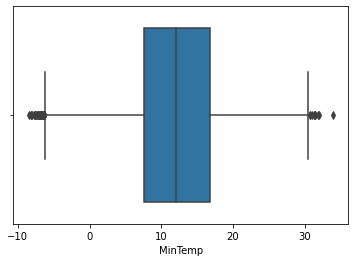

In [16]:
sns.boxplot(df['MinTemp'])

In [17]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

In [18]:
df['MaxTemp'].isnull().sum()

470

In [19]:
df['MaxTemp'].describe()

count    141729.000000
mean         23.229488
std           7.117423
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='MaxTemp'>

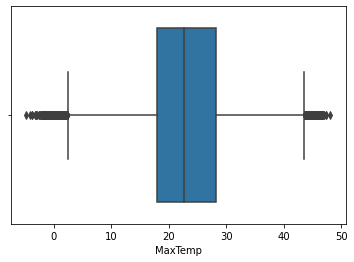

In [20]:
sns.boxplot(df['MaxTemp'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MaxTemp', ylabel='Density'>

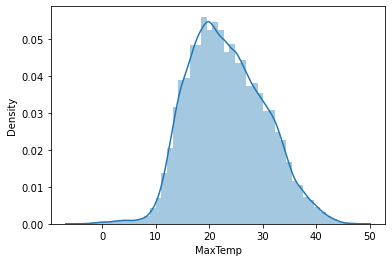

In [21]:
sns.distplot(df['MaxTemp'])

In [22]:
df['MaxTemp'].skew()

0.22531832699850304

In [23]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MaxTemp', ylabel='Density'>

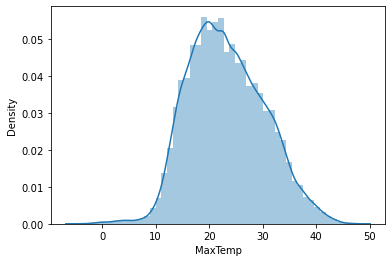

In [24]:
sns.distplot(df['MaxTemp'])

In [25]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9725
WindGustSpeed     9665
WindDir9am        9789
WindDir3pm        3799
WindSpeed9am      1091
WindSpeed3pm      2647
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

In [26]:
df['WindGustDir'].describe()

count     132474
unique        16
top            W
freq        9738
Name: WindGustDir, dtype: object

In [27]:
df['WindGustDir'].value_counts()

W      9738
SE     9282
E      9044
N      9032
SSE    8968
S      8911
WSW    8868
SW     8776
SSW    8582
WNW    8038
NW     7990
ENE    7983
ESE    7281
NE     7037
NNW    6528
NNE    6416
Name: WindGustDir, dtype: int64

In [28]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [29]:
df['WindGustSpeed'].describe()

count    132534.000000
mean         39.984427
std          13.587956
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [30]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

In [31]:
df['WindDir9am'].describe()

count     132410
unique        16
top            N
freq       11405
Name: WindDir9am, dtype: object

In [32]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [33]:
df['WindDir3pm'].describe()

count     138400
unique        16
top           SE
freq       10668
Name: WindDir3pm, dtype: object

In [34]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [35]:
df['WindSpeed9am'].describe()

count    141108.000000
mean         14.000149
std           8.897976
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

In [36]:
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())

In [37]:
df['WindSpeed3pm'].describe()

count    139552.000000
mean         18.636437
std           8.802729
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

In [38]:
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())

In [39]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

In [40]:
df['Humidity9am'].describe()

count    140645.000000
mean         68.847311
std          19.052408
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

In [41]:
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())

In [42]:
df['Humidity3pm'].describe()

count    138569.000000
mean         51.480843
std          20.806465
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64

In [43]:
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())

In [44]:
df['Pressure9am'].describe()

count    128259.000000
mean       1017.652608
std           7.105412
min         980.500000
25%        1012.900000
50%        1017.600000
75%        1022.400000
max        1041.000000
Name: Pressure9am, dtype: float64

In [45]:
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())

In [46]:
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())

In [47]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())

In [48]:
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

In [49]:
df['RainTomorrow'].describe()

count     140787
unique         2
top           No
freq      109586
Name: RainTomorrow, dtype: object

In [50]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [51]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [52]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


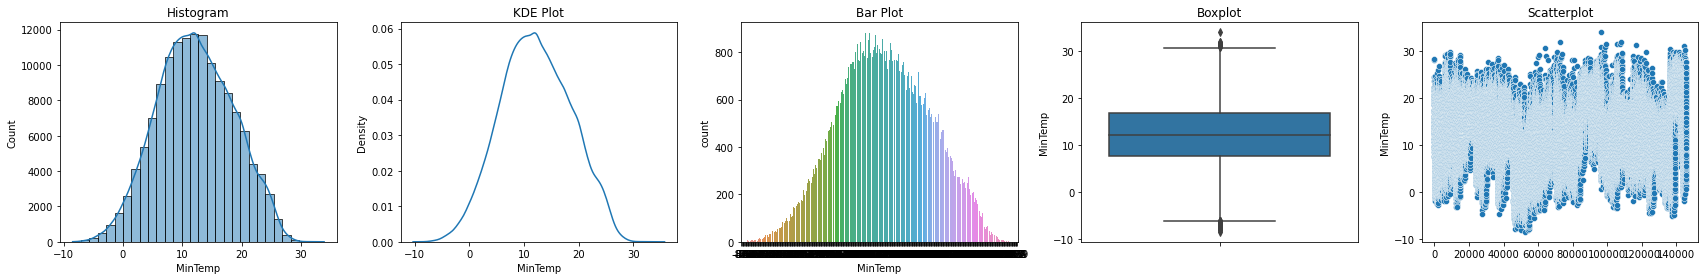

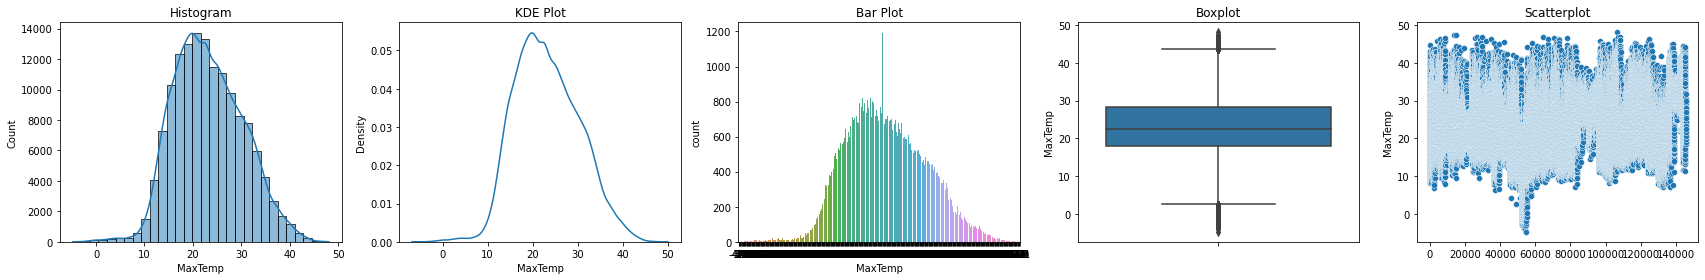

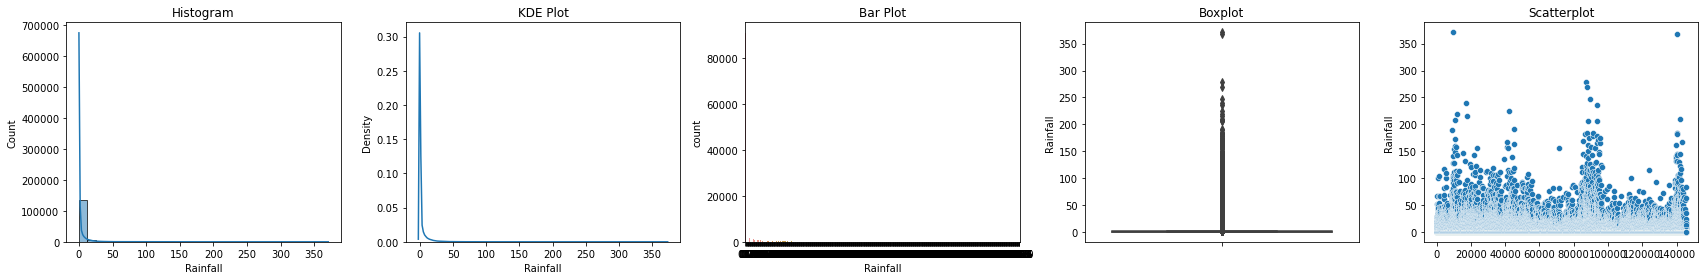

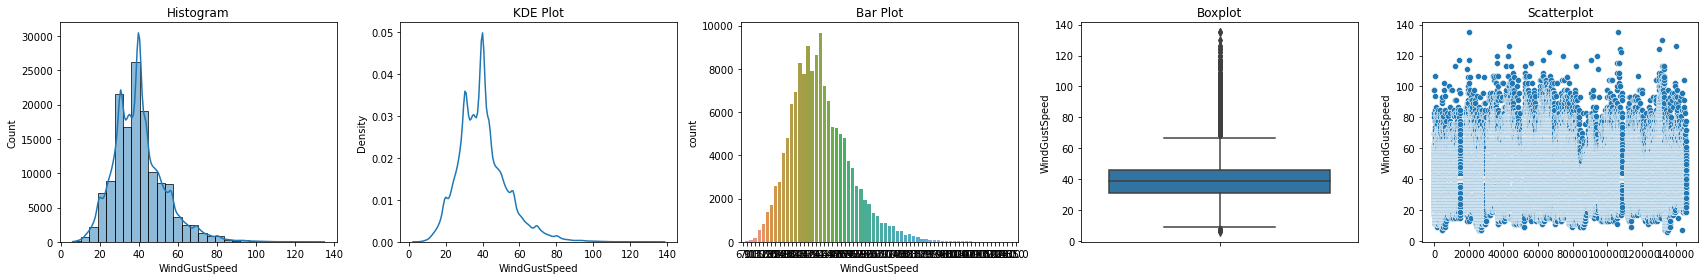

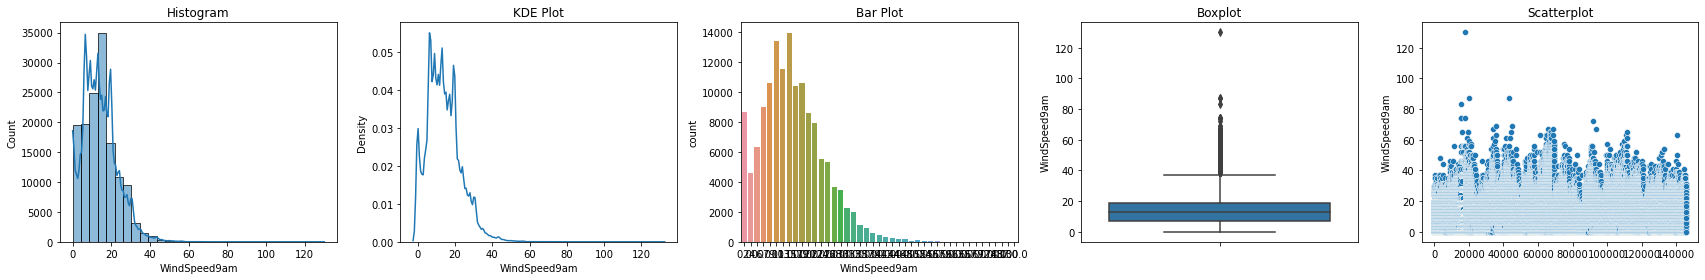

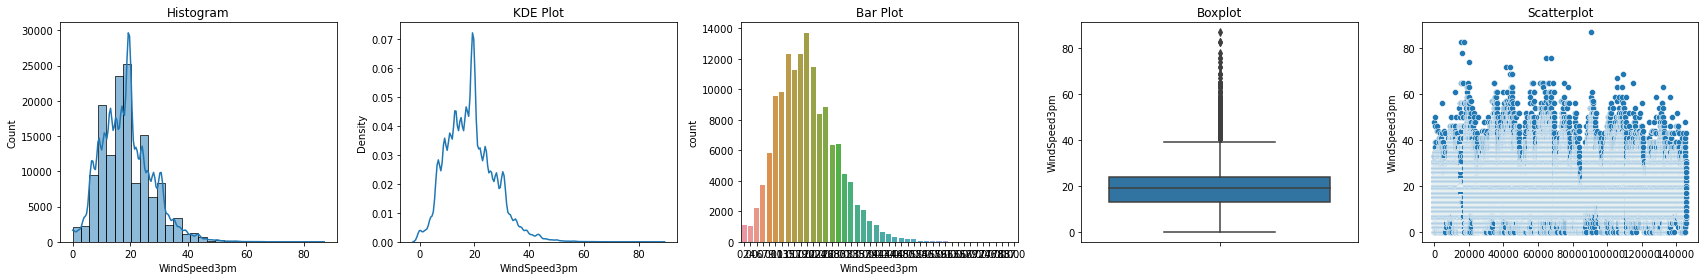

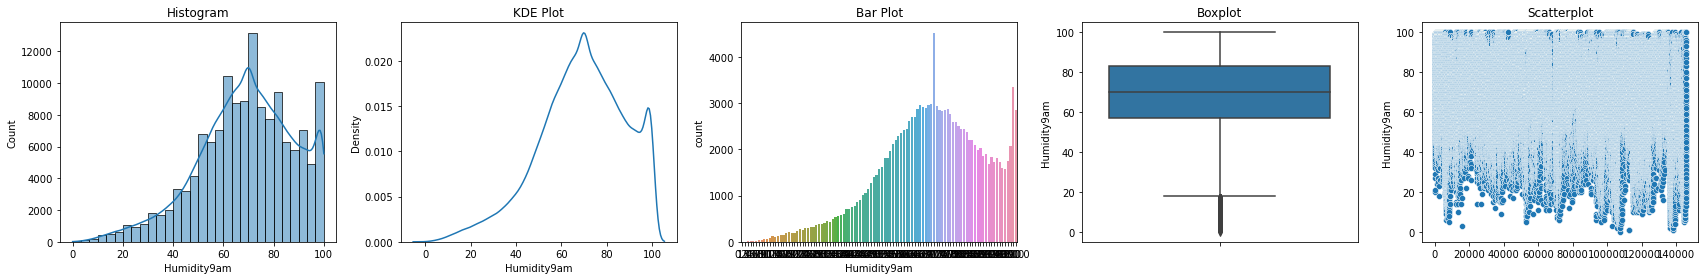

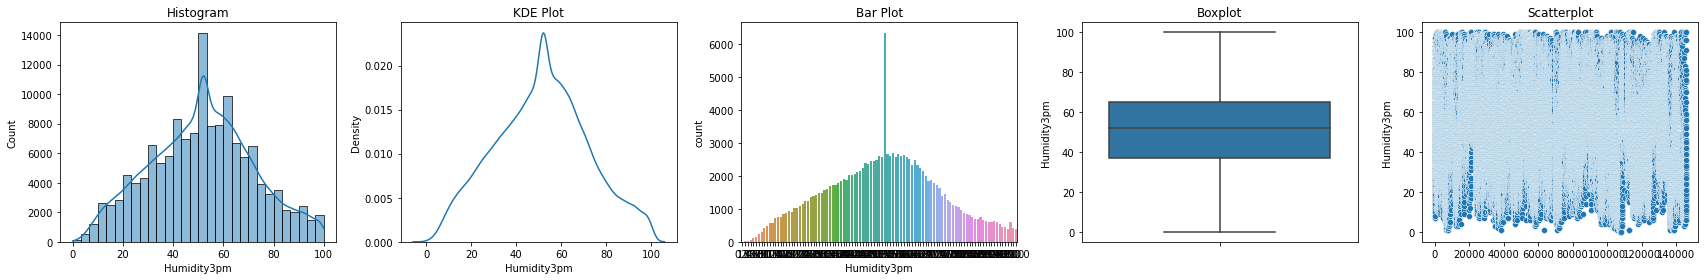

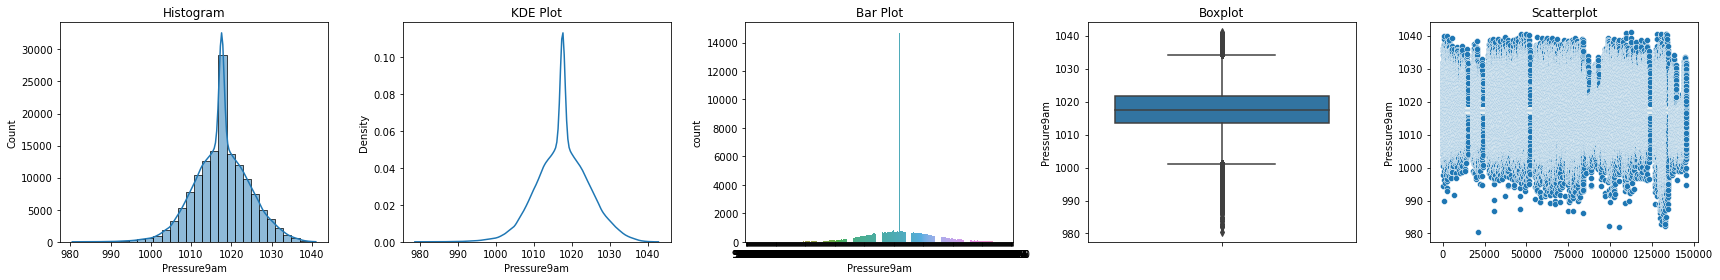

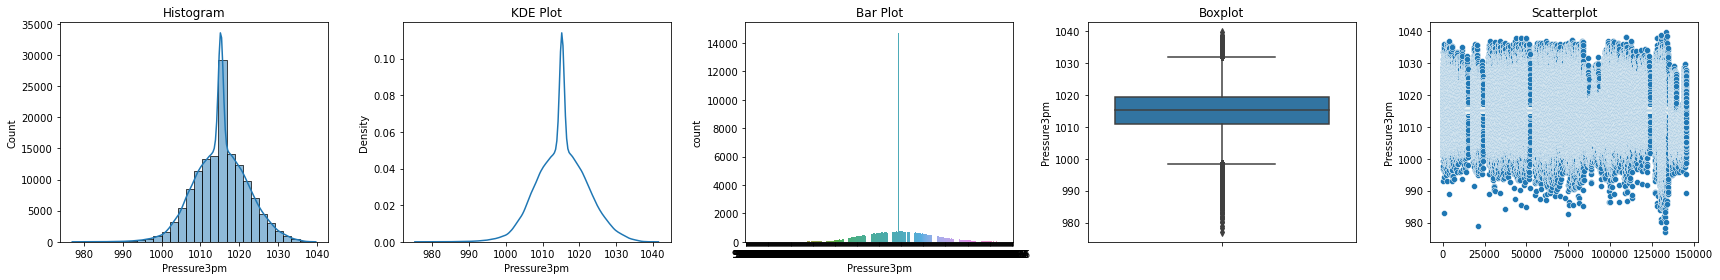

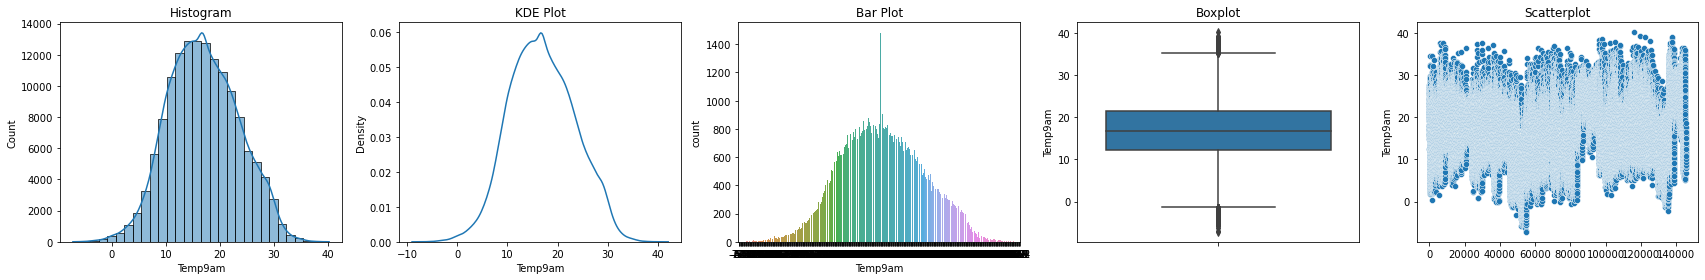

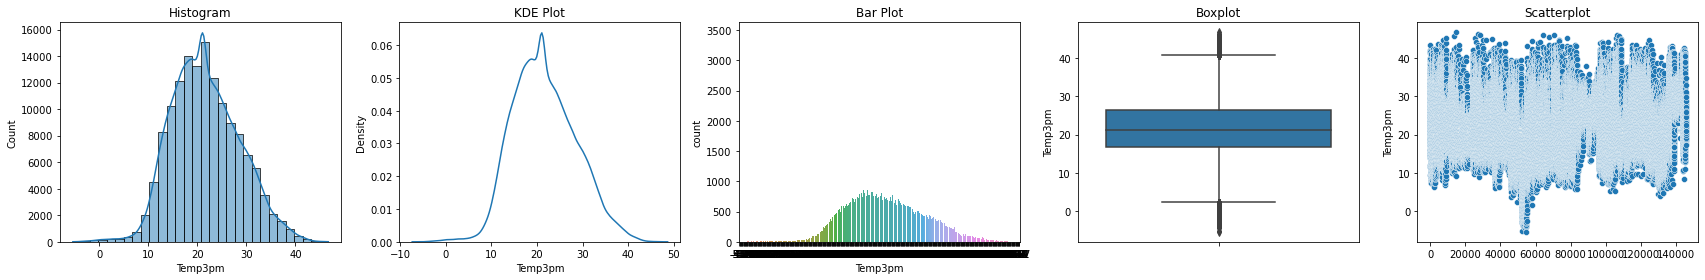

In [53]:
def plots(df, variable):
    if df[variable].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 5, figsize=(24, 4))

        # histogram
        sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')

        # KDE plot
        sns.kdeplot(df[variable], ax=ax[1])
        ax[1].set_title('KDE Plot')
        
        # bar plot
        sns.countplot(x=df[variable], ax=ax[2])
        ax[2].set_title('Bar Plot')

        # boxplot
        sns.boxplot(y=df[variable], ax=ax[3])
        ax[3].set_title('Boxplot')

        # scatterplot
        sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
        ax[4].set_title('Scatterplot')

        plt.tight_layout()
        plt.show()

for i in df.columns:
    plots(df, i)

In [54]:
df['Rainfall'].value_counts()

0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 681, dtype: int64

<AxesSubplot: >

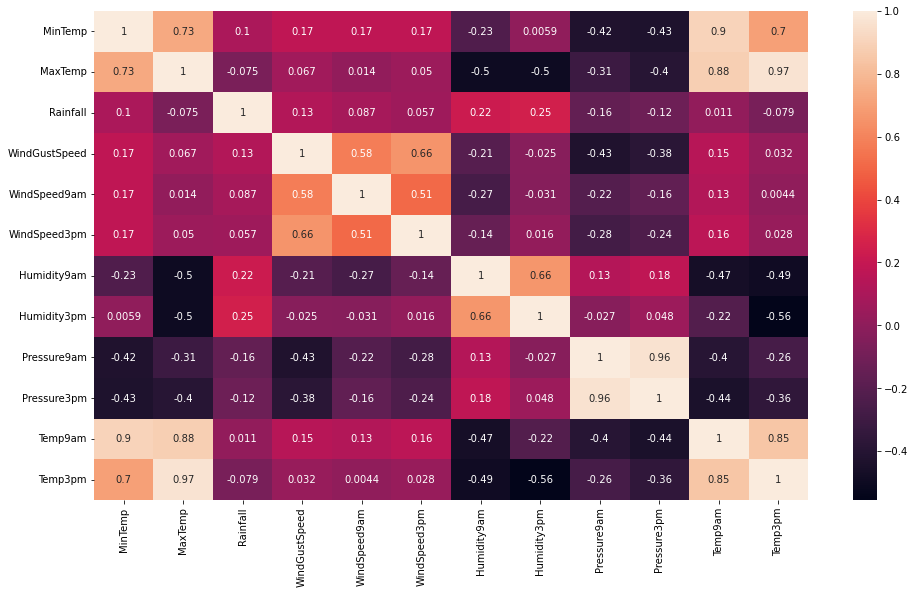

In [55]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [56]:
df.corr()['Rainfall']

MinTemp          0.103427
MaxTemp         -0.074733
Rainfall         1.000000
WindGustSpeed    0.127877
WindSpeed9am     0.086804
WindSpeed3pm     0.057195
Humidity9am      0.222882
Humidity3pm      0.250964
Pressure9am     -0.160404
Pressure3pm     -0.120613
Temp9am          0.011086
Temp3pm         -0.078534
Name: Rainfall, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142199 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142199 non-null  object 
 1   MinTemp        142199 non-null  float64
 2   MaxTemp        142199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    142199 non-null  object 
 5   WindGustSpeed  142199 non-null  float64
 6   WindDir9am     142199 non-null  object 
 7   WindDir3pm     142199 non-null  object 
 8   WindSpeed9am   142199 non-null  float64
 9   WindSpeed3pm   142199 non-null  float64
 10  Humidity9am    142199 non-null  float64
 11  Humidity3pm    142199 non-null  float64
 12  Pressure9am    142199 non-null  float64
 13  Pressure3pm    142199 non-null  float64
 14  Temp9am        142199 non-null  float64
 15  Temp3pm        142199 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   142199 non-nul

In [58]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [59]:
df['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3193
Hobart              3188
Brisbane            3161
Adelaide            3091
Bendigo             3034
Townsville          3033
AliceSprings        3032
MountGambier        3031
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3003
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2991
Cairns              2988
Cobar               2988
Wollongong          2982
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2942
NorahHead           2929
BadgerysCreek       2928


In [60]:
df['Location'] = le.fit_transform(df['Location'])

In [61]:
df['WindGustDir'].value_counts()

W      19463
SE      9282
E       9044
N       9032
SSE     8968
S       8911
WSW     8868
SW      8776
SSW     8582
WNW     8038
NW      7990
ENE     7983
ESE     7281
NE      7037
NNW     6528
NNE     6416
Name: WindGustDir, dtype: int64

In [62]:
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [63]:
df['WindDir9am'].value_counts()

N      21194
SE      9181
E       9057
SSE     8969
NW      8562
S       8510
W       8300
SW      8242
NNE     7963
NNW     7850
ENE     7730
ESE     7565
NE      7551
SSW     7464
WNW     7199
WSW     6862
Name: WindDir9am, dtype: int64

In [64]:
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])

In [65]:
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

In [66]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [67]:
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)

In [68]:
df['RainTomorrow'].value_counts()

No     110998
Yes     31201
Name: RainTomorrow, dtype: int64

In [69]:
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142199 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142199 non-null  int32  
 1   MinTemp        142199 non-null  float64
 2   MaxTemp        142199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    142199 non-null  int32  
 5   WindGustSpeed  142199 non-null  float64
 6   WindDir9am     142199 non-null  int32  
 7   WindDir3pm     142199 non-null  int32  
 8   WindSpeed9am   142199 non-null  float64
 9   WindSpeed3pm   142199 non-null  float64
 10  Humidity9am    142199 non-null  float64
 11  Humidity3pm    142199 non-null  float64
 12  Pressure9am    142199 non-null  float64
 13  Pressure3pm    142199 non-null  float64
 14  Temp9am        142199 non-null  float64
 15  Temp3pm        142199 non-null  float64
 16  RainToday      142199 non-null  int64  
 17  RainTomorrow   142199 non-nul

In [72]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [75]:
X_train_trf = rs.fit_transform(X_train)
X_test_trf = rs.transform(X_test)

In [76]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective='binary:logistic')

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [78]:
xgbc.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
from sklearn.metrics import accuracy_score,classification_report

In [80]:
xtrain_score = xgbc.score(X_train_trf,y_train)
xtest_score = xgbc.score(X_test_trf,y_test)

In [81]:
xtrain_score,xtest_score

(0.8866072594661389, 0.8593999062353492)

In [82]:
y_pred = xgbc.predict(X_test_trf)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33272
           1       0.75      0.54      0.63      9388

    accuracy                           0.86     42660
   macro avg       0.81      0.75      0.77     42660
weighted avg       0.85      0.86      0.85     42660



In [85]:
! pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [86]:
X_train_res,y_train_res = smote.fit_resample(X_train,y_train)
X_test_res,y_test_res = smote.fit_resample(X_test,y_test)

In [87]:
X_train_res_trf = rs.fit_transform(X_train_res)
X_test_res_trf = rs.transform(X_test_res)

In [88]:
xgbc.fit(X_train_res_trf,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
xtrain_res_score = xgbc.score(X_train_res_trf,y_train_res)
xtest_res_score = xgbc.score(X_test_res_trf,y_test_res)

In [90]:
xtrain_res_score,xtest_res_score

(0.9190746982991534, 0.9045894445780236)

In [91]:
y_pred_res = xgbc.predict(X_test_res_trf)

In [92]:
print(classification_report(y_test_res,y_pred_res))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33272
           1       0.93      0.87      0.90     33272

    accuracy                           0.90     66544
   macro avg       0.91      0.90      0.90     66544
weighted avg       0.91      0.90      0.90     66544



In [93]:
import pickle


In [94]:
pickle.dump(xgbc,open('xgbmodel.pkl','wb'))

In [96]:
pickle_model = pickle.load(open('xgbmodel.pkl','rb'))

In [99]:
pickle_model.predict(X_test_res_trf)[0]

0